In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X, y = datasets.make_blobs(n_samples=150,n_features = 2,centers=2,cluster_std=10,random_state=10)

In [ ]:
print(np.shape(y))

(150,)


In [ ]:
print(np.shape(X))

(150, 2)


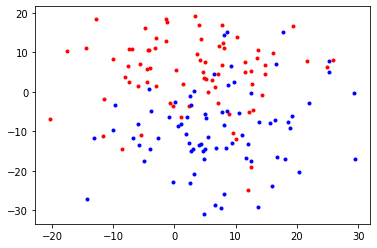

In [ ]:
for i in range(np.shape(X)[0]):
  if(y[i] == 0):
    plt.plot(X[i][0],X[i][1], '.b')
  else:
    plt.plot(X[i][0],X[i][1], '.r')

Text(0, 0.5, 'feature 2')

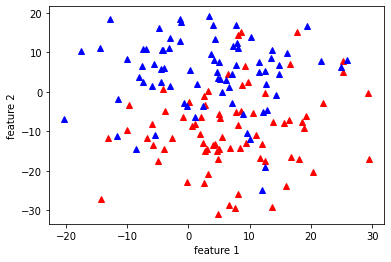

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.plot(X[:,0][y == 0],X[:,1][y == 0],'r^')
plt.plot(X[:,0][y == 1],X[:,1][y == 1],'b^')
plt.xlabel("feature 1")
plt.ylabel("feature 2")

In [ ]:
def step_func(z):
  return int(z >= 0)

In [ ]:
def perceptron(X, y, lr, epochs):
  m, n = X.shape
  theta = np.zeros((n+1,1))
  n_miss_list = []
  for epoch in range(epochs):
    n_miss = 0
    for idx, x_i in enumerate(X):
      x_i = np.insert(x_i, 0, 1).reshape(-1,1)
      y_hat = step_func(np.dot(x_i.T, theta))
      if(np.squeeze(y_hat) - y[idx]) != 0:
        theta += lr*((y[idx])-y_hat)*x_i
        n_miss += 1
    n_miss_list.append(n_miss)
  
  return theta, n_miss_list


In [ ]:
def plot_decision(X, theta):
  m = (-1)*theta[1]/theta[2]
  c = (-1)*theta[0]/theta[2]
  y_min = m*np.min(X[:,0])+c
  y_max = m*np.max(X[:,0])+c
  plt.plot([np.min(X[:,0]),np.max(X[:,0])], [y_min, y_max], 'k')

In [ ]:
theta, n_m = perceptron(X, y, 0.01, 50)

In [ ]:
x = np.array([1, 6, 2])
y_ped = step_func(np.dot(x.T, theta))

In [ ]:
y_ped

1

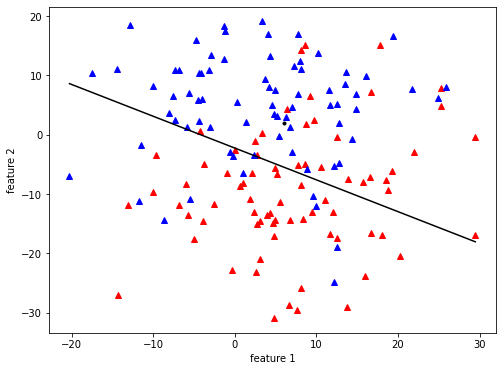

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(X[:,0][y == 0],X[:,1][y == 0],'r^')
plt.plot(X[:,0][y == 1],X[:,1][y == 1],'b^')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plot_decision(X, theta)
plt.plot(x[1],x[2], '.k')
